In [14]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
# take out first sheet from xlsx file
data = pd.read_excel('Crowdfunding campaign.xlsx', sheet_name=0)
# drop the null values
data.dropna(inplace=True)

# data.dropna(subset=['cid'], inplace=True)
# drop duplicates based on cid
# data.drop_duplicates(subset=['cid'],inplace=True)

# drop the rows that are duplicates
data.drop_duplicates(inplace=True)
data.head()

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,delivery
17,112718,1,600,2.541667,0,0,1.0,Idaho,2012,0.0,0.0
26,116927,1,10000,3.326000,0,1,1.0,Texas,2012,0.0,1.0
30,118858,1,45000,1.016933,1,0,0.0,Florida,2013,0.0,1.0
37,123964,1,200000,2.761210,1,0,0.0,California,2012,1.0,1.0
38,126369,1,1000,25.271000,1,0,0.0,Texas,2013,1.0,0.0


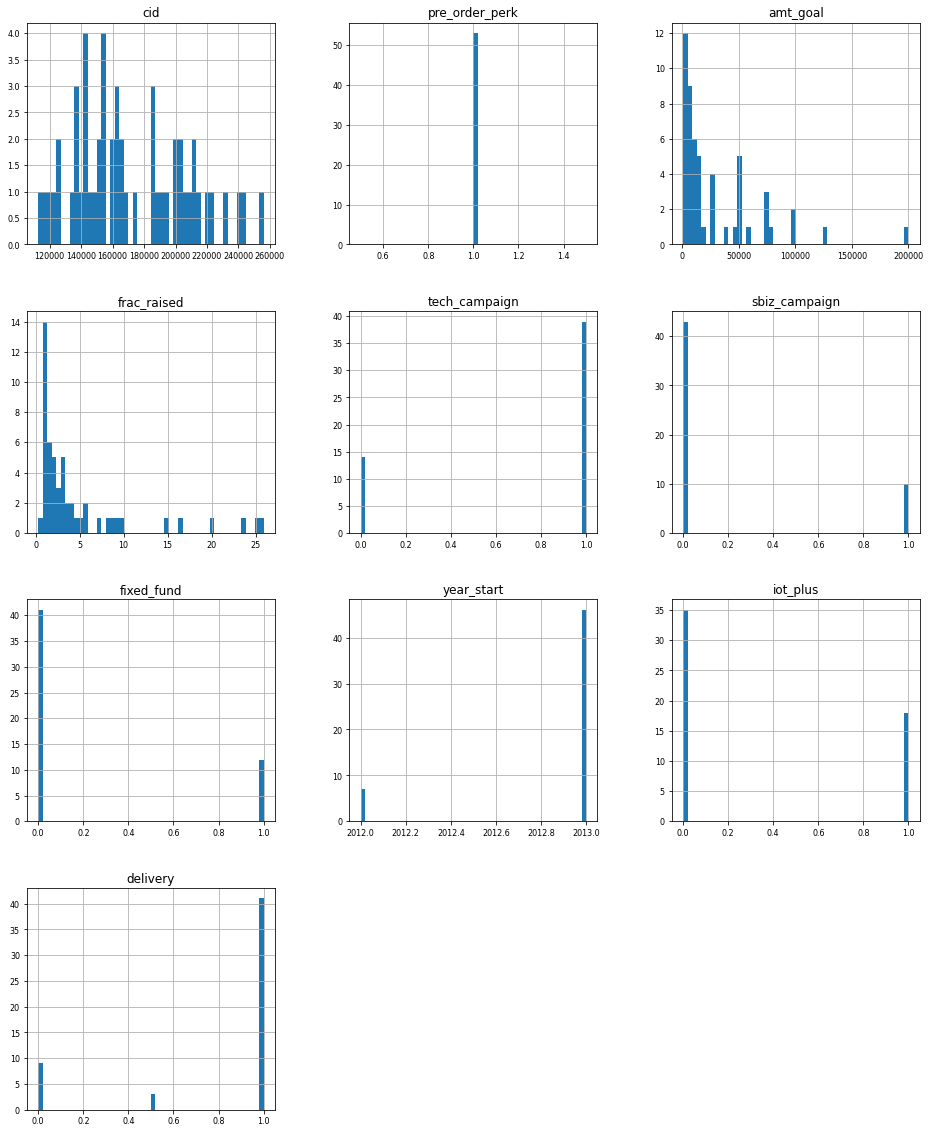

In [15]:
data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

In [16]:
data.describe()

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
count,53.000000,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,171583.339623,1.0,29137.735849,5.011500,0.735849,0.188679,0.226415,2012.867925,0.339623,0.801887
std,35969.678047,0.0,38866.533094,6.374357,0.445099,0.394998,0.422516,0.341813,0.478113,0.384053
min,112718.000000,1.0,500.000000,0.306733,0.000000,0.000000,0.000000,2012.000000,0.000000,0.000000
25%,143167.000000,1.0,5000.000000,1.089605,0.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
50%,163502.000000,1.0,10000.000000,2.488000,1.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
75%,201165.000000,1.0,50000.000000,5.034400,1.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
max,256062.000000,1.0,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000


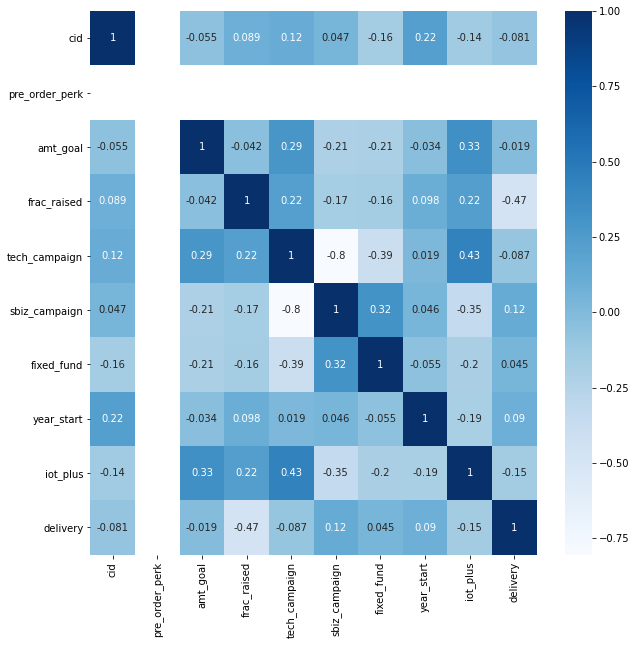

In [17]:
sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.gcf().set_size_inches(10, 10)

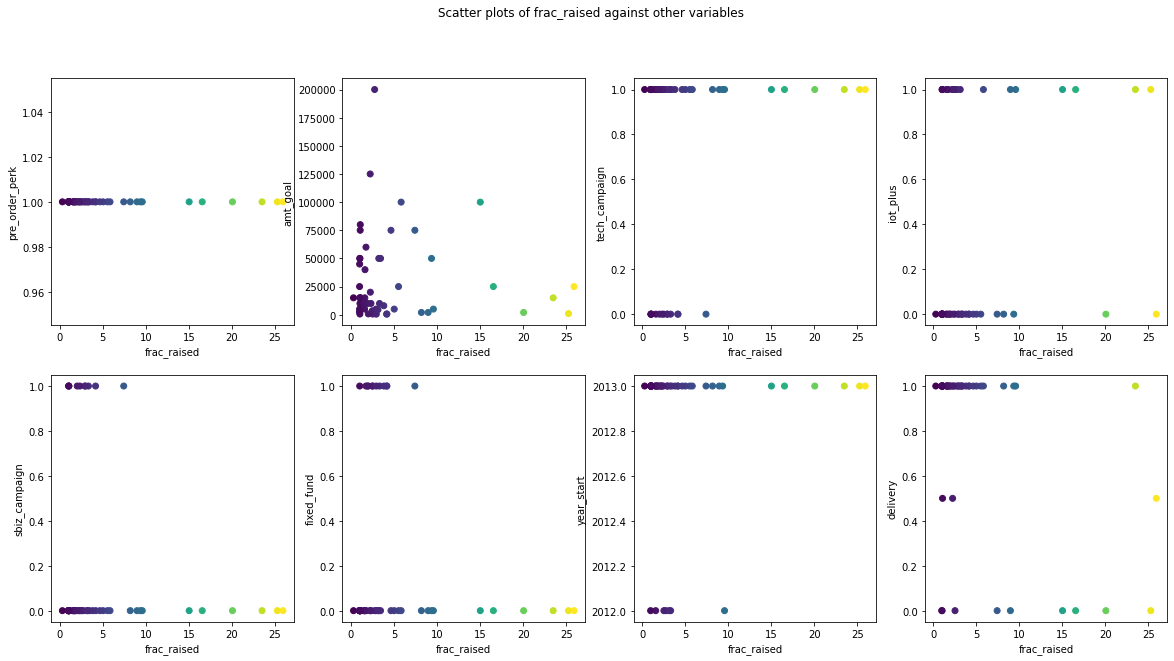

In [19]:
# add multiple plots in one figure
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0, 0].scatter(data["frac_raised"], data["pre_order_perk"], c=data["frac_raised"])
ax[0, 0].set_xlabel("frac_raised")
ax[0, 0].set_ylabel("pre_order_perk")
ax[0, 1].scatter(data["frac_raised"], data["amt_goal"], c=data["frac_raised"])
ax[0, 1].set_xlabel("frac_raised")
ax[0, 1].set_ylabel("amt_goal")
ax[0, 2].scatter(data["frac_raised"], data["tech_campaign"], c=data["frac_raised"])
ax[0, 2].set_xlabel("frac_raised")
ax[0, 2].set_ylabel("tech_campaign")
ax[1, 0].scatter(data["frac_raised"], data["sbiz_campaign"], c=data["frac_raised"])
ax[1, 0].set_xlabel("frac_raised")
ax[1, 0].set_ylabel("sbiz_campaign")
ax[1, 1].scatter(data["frac_raised"], data["fixed_fund"], c=data["frac_raised"])
ax[1, 1].set_xlabel("frac_raised")
ax[1, 1].set_ylabel("fixed_fund")
ax[1, 2].scatter(data["frac_raised"], data["year_start"], c=data["frac_raised"])
ax[1, 2].set_xlabel("frac_raised")
ax[1, 2].set_ylabel("year_start")
ax[0, 3].scatter(data["frac_raised"], data["iot_plus"], c=data["frac_raised"])
ax[0, 3].set_xlabel("frac_raised")
ax[0, 3].set_ylabel("iot_plus")
ax[1, 3].scatter(data["frac_raised"], data["delivery"], c=data["frac_raised"])
ax[1, 3].set_xlabel("frac_raised")
ax[1, 3].set_ylabel("delivery")
# add a title to the figure
fig.suptitle("Scatter plots of frac_raised against other variables")
plt.show()

In [27]:
target = data['frac_raised']

# maybe remove state? because it is a categorical variable
predictor = data.drop(columns=['frac_raised', 'cid', 'state'])
# predictor = data.iloc[:,data.columns!='frac_raised']

In [21]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=0)

In [42]:
# Fit a logistic regression model on the training set
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = linreg.predict(X_test)

# RMSE
print(f'RMSE is {mean_squared_error(y_test, y_pred, squared = False)}')

RMSE is 7.152140250823968


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

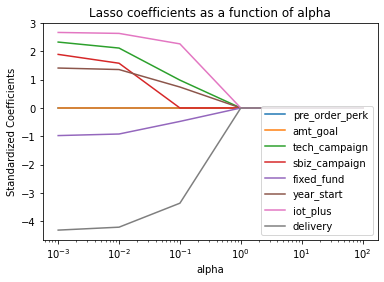

In [66]:
# fit lasso regression on model
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs, label=['pre_order_perk', 'amt_goal', 'tech_campaign', 'sbiz_campaign', 'fixed_fund', 'year_start', 'iot_plus', 'delivery'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='lower right')
plt.title('Lasso coefficients as a function of alpha')

Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

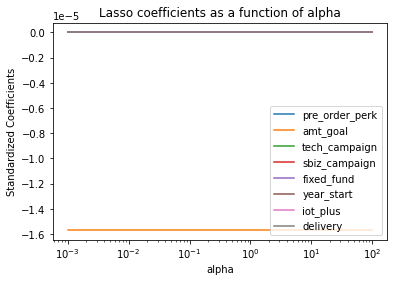

In [67]:
# fit lasso regression on model
from sklearn.linear_model import Ridge

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs, label=['pre_order_perk', 'amt_goal', 'tech_campaign', 'sbiz_campaign', 'fixed_fund', 'year_start', 'iot_plus', 'delivery'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='lower right')
plt.title('Lasso coefficients as a function of alpha')